<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/paper/customizing_train_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file shows a minimal example how to customize `train_step` using the Model class of AI4water


In [2]:
try:
    import ai4water
except (ImportError, ModuleNotFoundError):
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git"

In [3]:
import tensorflow as tf

tf.__version__

'2.1.0'

In [4]:
from ai4water import Model
from ai4water.datasets import busan_beach

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



**********Pytorch models could not be imported **********



In [5]:
class CustomModel(Model):

    def train_step(self, data):
        print('custom train_step')
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

In [12]:
model = CustomModel(
    model={"layers": {
        "Input": {"shape": (13,)},
        "Dense_1": 64,
        "Dropout_1": 0.2,
        "Dense_2": 32,
        "Dropout_2": 0.2,
        "Dense_3": 16,
        "Dropout_3": 0.2,
        "Dense_4": 8,
        "Dense_5": 1,
                      }
           },
    lookback=1,
    lr=8.95e-5
)


building DL model for  regression problem using CustomModel
Model: "custom_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                528       
__________________________________________________________


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (139, 13)
target shape:  (139, 1, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (35, 13)
target shape:  (35, 1, 1)
Train on 139 samples, validate on 35 samples
Epoch 1/14
assigning name input_1 to IteratorGetNext:0 with shape (None, 13)
assigning name input_1 to IteratorGetNext:0 with shape (None, 13)
139/139 [==============================] - 0s 4ms/sample - loss: 655322894159901.5000 - nse: -0.1587 - val_loss: 834767940155567.5000 - val_nse: -0.4816
Epoch 2/14
139/139 [==============================] - 0s 137us/sample - loss: 655322812938637.8750 - nse: -0.1375 - val_loss: 834767052041654.8750 - val_nse: -0.4816
Epoch 3/14
139/139 [==============================] - 0s 137us/sample - loss: 655321530326509.5000 - nse: -0.2060 - val_loss: 834766225643929.6250 - val_nse: -0.4816
Epoch 4/14
139/139 [==============================] - 0

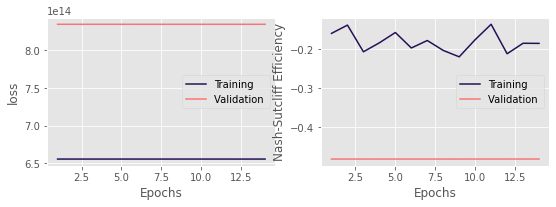

********** Successfully loaded weights from weights_014_834756892718343.37500.hdf5 file **********


In [13]:
h = history = model.fit(data=busan_beach())